<a href="https://colab.research.google.com/github/Forcesaj/GA_MLR/blob/main/best_result_Testing_Menjadi_Aplikasi_Menggunakan_BBRI_JK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BBRI.JK(RAW) - Copy.csv to BBRI.JK(RAW) - Copy.csv


In [3]:
# Import Library yang dibutuhkan
import pandas as pd                      # tabel pandas
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # matrix
import io

import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

df_dataset = pd.read_csv(io.BytesIO(uploaded['BBRI.JK(RAW) - Copy.csv']), names=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close','Volume'], header=None)
# Menampilkan Data Set
df_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-18,3550.0,3640.0,3550.0,3630.0,3373.769043,118738900
1,2018-12-19,3600.0,3670.0,3600.0,3670.0,3410.945557,133097500
2,2018-12-20,3610.0,3660.0,3610.0,3650.0,3392.357178,67329000
3,2018-12-21,3610.0,3630.0,3600.0,3620.0,3364.475098,174467000
4,2018-12-24,3620.0,3620.0,3620.0,3620.0,3364.475098,0
...,...,...,...,...,...,...,...
495,2020-12-07,4350.0,4420.0,4350.0,4400.0,4400.000000,140849600
496,2020-12-08,4400.0,4400.0,4340.0,4400.0,4400.000000,81272000
497,2020-12-09,4400.0,4400.0,4400.0,4400.0,4400.000000,0
498,2020-12-10,4450.0,4450.0,4330.0,4330.0,4330.000000,193630600


In [4]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       500 non-null    object 
 1   Open       500 non-null    float64
 2   High       500 non-null    float64
 3   Low        500 non-null    float64
 4   Close      500 non-null    float64
 5   Adj Close  500 non-null    float64
 6   Volume     500 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [5]:
df_dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

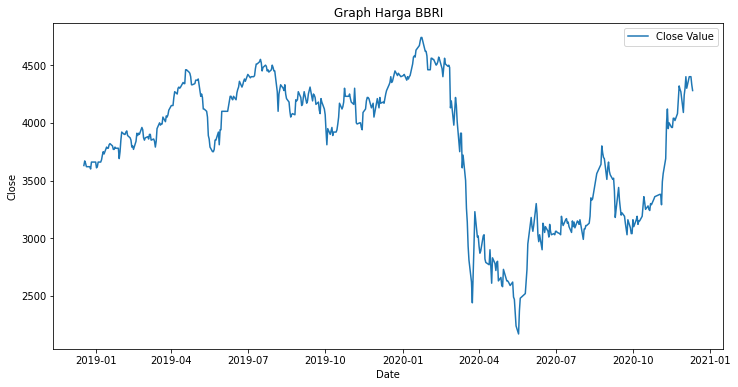

In [6]:
# Visualisasi Graph Harga Saham BBRI dari 2015 - 2020
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
import csv
import datetime

date=[]
close=[]

for x in range(len(df_dataset)):
  date.append(datetime.datetime.strptime(df_dataset.at[x,'Date'], '%Y-%m-%d'))
  close.append(df_dataset.at[x,'Close'])

plt.figure(figsize=(12,6))
plt.plot(date,close ,label='Close Value')
plt.xlabel('Date')
plt.ylabel('Close')

plt.title('Graph Harga BBRI')
plt.legend()
plt.show()

In [7]:
#Membuat Data Random
import random
# jumlah baris
SLIDE_WINDOWS = 5
# jumlah kolom (genapkan agar dapat digunakan untuk crossover)
POP_SIZE = 500
# +1
GENE_LENGTH = SLIDE_WINDOWS + 1

populasi = []

# membuat jumlah individu sesuai jumlah awal populasi
for x in range(POP_SIZE):
    individu = {}
    # membuat nilai random untuk setiap gen
    for y in range(GENE_LENGTH):      
      individu['indv'+ str(y)] = random.random()
    populasi.append(individu)

# menampilkan populasi
df_koef = pd.DataFrame(list(populasi))
df_koef

,indv0,indv1,indv2,indv3,indv4,indv5
0,0.921519,0.785458,0.431570,0.745121,0.306146,0.465596
1,0.253884,0.444060,0.805855,0.394189,0.895665,0.349207
2,0.815802,0.144471,0.570682,0.735145,0.779561,0.732055
3,0.806684,0.825065,0.781430,0.109540,0.101007,0.778769
4,0.932207,0.458987,0.158861,0.218777,0.566612,0.733212
...,...,...,...,...,...,...
495,0.125672,0.606466,0.863307,0.332320,0.469964,0.546771
496,0.264258,0.267156,0.324145,0.043698,0.775280,0.861074
497,0.552380,0.132150,0.095656,0.978651,0.255750,0.443879
498,0.776157,0.850342,0.747467,0.310909,0.552057,0.593409


In [8]:
# Fitness Value

# Multi Linear Regression / MLR
from decimal import *
getcontext().prec = 5

# function menghitung Multi Linear Regression
def get_MLR(index_individu, hari_mulai):

  MLR = df_koef.iat[index_individu,0]
  # MLR = koefisien 0
  hari_ke = hari_mulai

  for y in range(SLIDE_WINDOWS):
    # MLR = MLR + kefisien * data    
    MLR = MLR + df_koef.iat[index_individu,y+1] * df_dataset.at[hari_ke,'Close']
    hari_ke += 1
  #iat mengambil value spesifik di kolom brp baris brp
  return MLR
#===============================================================================

# MSE
def get_MSE(index_individu) :
  total_square_error = 0
  end = len(df_dataset) - SLIDE_WINDOWS

  for x in range(end):
    # menghitung square error
    square_error = np.power( get_MLR(index_individu,x) - df_dataset.at[x + SLIDE_WINDOWS,'Close'], 2)
    total_square_error += square_error
  
  mse = (1 / (len(df_dataset) - SLIDE_WINDOWS)) * total_square_error
  return mse
# ==============================================================================

# Fitness Value 
fitness_individu = []
end = len(df_koef)

for z in range(end) :
  fitness = 1 / (get_MSE(z) + 1 )
  fitness_individu.append(fitness)
# ==============================================================================

# Visualisasi data frame(koefisien + fitness)  
df_individu = df_koef.assign(fitness = fitness_individu) 
df_individu

,indv0,indv1,indv2,indv3,indv4,indv5,fitness
0,0.921519,0.785458,0.431570,0.745121,0.306146,0.465596,2.234623e-08
1,0.253884,0.444060,0.805855,0.394189,0.895665,0.349207,1.882535e-08
2,0.815802,0.144471,0.570682,0.735145,0.779561,0.732055,1.744058e-08
3,0.806684,0.825065,0.781430,0.109540,0.101007,0.778769,2.638452e-08
4,0.932207,0.458987,0.158861,0.218777,0.566612,0.733212,5.198486e-08
...,...,...,...,...,...,...,...
495,0.125672,0.606466,0.863307,0.332320,0.469964,0.546771,2.031075e-08
496,0.264258,0.267156,0.324145,0.043698,0.775280,0.861074,4.153467e-08
497,0.552380,0.132150,0.095656,0.978651,0.255750,0.443879,8.174698e-08
498,0.776157,0.850342,0.747467,0.310909,0.552057,0.593409,1.592148e-08


In [9]:
# Menghitung Probabilitas
total_fitness = df_individu['fitness'].sum()
list_probabilitas = []
#probabilitas = fitness / total fitness
for x in range(len(df_individu)):
  nilai_probabilitas = df_individu.at[x,'fitness'] / total_fitness
  list_probabilitas.append(nilai_probabilitas)
  
# menampilkan data frame (individu + probabilitas)
df_individu = df_individu.assign(probabilitas = list_probabilitas)
df_individu

,indv0,indv1,indv2,indv3,indv4,indv5,fitness,probabilitas
0,0.921519,0.785458,0.431570,0.745121,0.306146,0.465596,2.234623e-08,0.000096
1,0.253884,0.444060,0.805855,0.394189,0.895665,0.349207,1.882535e-08,0.000081
2,0.815802,0.144471,0.570682,0.735145,0.779561,0.732055,1.744058e-08,0.000075
3,0.806684,0.825065,0.781430,0.109540,0.101007,0.778769,2.638452e-08,0.000113
4,0.932207,0.458987,0.158861,0.218777,0.566612,0.733212,5.198486e-08,0.000223
...,...,...,...,...,...,...,...,...
495,0.125672,0.606466,0.863307,0.332320,0.469964,0.546771,2.031075e-08,0.000087
496,0.264258,0.267156,0.324145,0.043698,0.775280,0.861074,4.153467e-08,0.000179
497,0.552380,0.132150,0.095656,0.978651,0.255750,0.443879,8.174698e-08,0.000351
498,0.776157,0.850342,0.747467,0.310909,0.552057,0.593409,1.592148e-08,0.000068


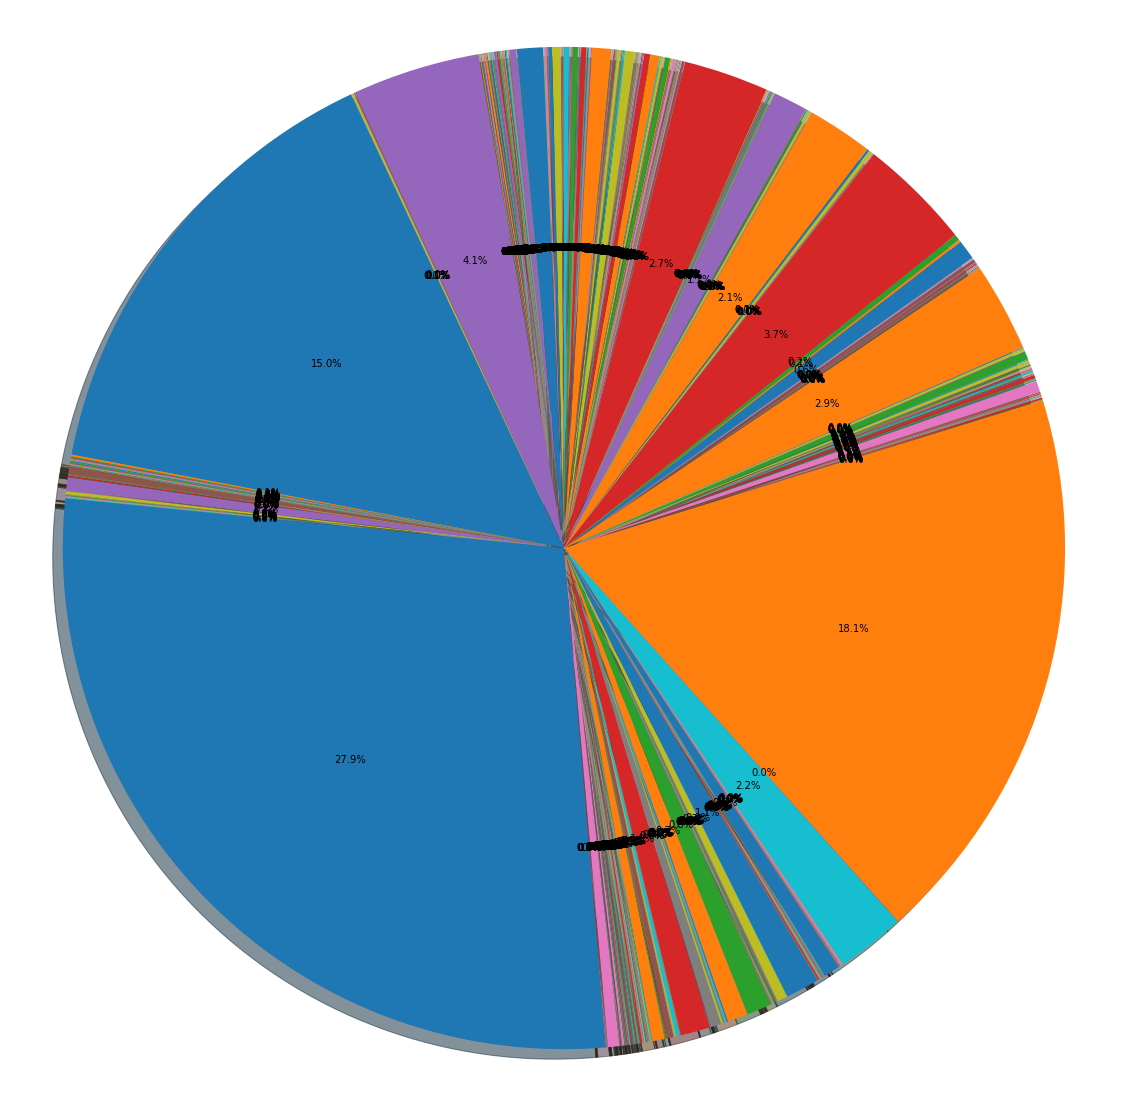

In [10]:
# Visualisasi menggunakan roulete wheel
sizes = df_individu['probabilitas']

fig1, ax1 = plt.subplots(figsize=(20,20))
ax1.pie(sizes,  autopct='%1.1f%%',
        shadow=True, startangle=90)
# Dibuat equal agar chartnya dalam bentuk lingkaran
ax1.axis('equal')  

plt.show()

In [11]:
# Selection
def get_select(df_populasi):
  
  r = random.random()
  #pointer pada roulette wheel
  partialsum = 0
  #populasi = perbaris
  for x in range(len(df_populasi)):
    #populasi idx0-idx500
    partialsum += df_populasi.at[x,'probabilitas']
    
    if partialsum > r:
      return x

terpilih = []
#individu = perkolom
for y in range(len(df_individu)):
  pilih = get_select(df_individu)
  terpilih.append(pilih)

series_terpilih = pd.Series(terpilih)

# menampilkan individu terpilih / generasi baru Z

generasi_baru = []

for z in range(len(series_terpilih)):
  generasi_baru.append(df_individu.iloc[series_terpilih[z]])

generasi_baru = pd.DataFrame(generasi_baru).reset_index(drop=True)
generasi_baru

,indv0,indv1,indv2,indv3,indv4,indv5,fitness,probabilitas
0,0.027144,0.155323,0.029815,0.606226,0.181312,0.002708,3.496421e-05,0.150275
1,0.418724,0.185190,0.174643,0.347320,0.109234,0.279427,6.680495e-06,0.028713
2,0.027144,0.155323,0.029815,0.606226,0.181312,0.002708,3.496421e-05,0.150275
3,0.027144,0.155323,0.029815,0.606226,0.181312,0.002708,3.496421e-05,0.150275
4,0.879973,0.514144,0.007745,0.203128,0.368277,0.200491,7.713030e-07,0.003315
...,...,...,...,...,...,...,...,...
495,0.027144,0.155323,0.029815,0.606226,0.181312,0.002708,3.496421e-05,0.150275
496,0.027144,0.155323,0.029815,0.606226,0.181312,0.002708,3.496421e-05,0.150275
497,0.027144,0.155323,0.029815,0.606226,0.181312,0.002708,3.496421e-05,0.150275
498,0.027144,0.155323,0.029815,0.606226,0.181312,0.002708,3.496421e-05,0.150275


In [12]:
# Crossover
# tentukan nilai alpha
alpha = 0.4
# offspring = child
list_child = []

# whole arithmetic crossover
def cross_over(parent1,parent2,list_child):
  
  child1 = {}
  for x in range(SLIDE_WINDOWS+1):
    child1['indv'+ str(x)] = alpha*parent1.iat[x] + (1-alpha)*parent2.iat[x]
  list_child.append(child1)

  child2 = {}
  for x in range(SLIDE_WINDOWS+1):
    child2['indv'+ str(x)] = alpha*parent2.iat[x] + (1-alpha)*parent1.iat[x]
  list_child.append(child2)

#prob cross 
probabilitas_crossover = 0.6
jumlah_parent = round(len(generasi_baru) * probabilitas_crossover)
#=========================================================================

#proses crossover
for x in range(jumlah_parent):
  #jika ganjil jadi parent 1
  if ((x+1) % 2) == 1:
    parent1 = generasi_baru.iloc[x]
  #jika genap jadi parent 2
  if ((x+1) % 2) == 0:
    parent2 = generasi_baru.iloc[x]
    #jika sudah memiliki 2 parent baru bisa di crossover
    cross_over(parent1,parent2,list_child)

hasil_child = pd.DataFrame(list_child)

#update generasi baru 
generasi_baru = generasi_baru.drop("fitness", axis=1)
generasi_baru = generasi_baru.drop("probabilitas", axis=1)
generasi_baru.update(hasil_child)
#visualisasi generasi baru
print(generasi_baru)

        indv0     indv1     indv2     indv3     indv4     indv5
0    0.262092  0.173243  0.116712  0.450882  0.138065  0.168739
1    0.183776  0.167270  0.087746  0.502663  0.152481  0.113396
2    0.027144  0.155323  0.029815  0.606226  0.181312  0.002708
3    0.027144  0.155323  0.029815  0.606226  0.181312  0.002708
4    0.685610  0.217265  0.147187  0.218787  0.170410  0.374480
..        ...       ...       ...       ...       ...       ...
495  0.027144  0.155323  0.029815  0.606226  0.181312  0.002708
496  0.027144  0.155323  0.029815  0.606226  0.181312  0.002708
497  0.027144  0.155323  0.029815  0.606226  0.181312  0.002708
498  0.027144  0.155323  0.029815  0.606226  0.181312  0.002708
499  0.008479  0.415395  0.276087  0.006917  0.190581  0.997789

[500 rows x 6 columns]


In [13]:
# Mutasi
probabilitas_jumlah_terpilih = 0.2
banyak_yang_terpilih = round(POP_SIZE * probabilitas_jumlah_terpilih)

# memilih individu secara random
indeks_terpilih = []

for x in range(banyak_yang_terpilih):
  r = random.randint(0, len(generasi_baru)-1)
  if (x) == 0:    
    indeks_terpilih.append(r)
  else:
    # untuk menghindari nilai yang sama
    while r in indeks_terpilih:
      r = random.randint(0, len(generasi_baru)-1)
    indeks_terpilih.append(r)
# ==============================================================================

# function mutasi
for x in range(len(indeks_terpilih)):
  # menentukan index gen yang dirubah
  igen_change = random.randint(0, GENE_LENGTH-1)
  
  # angka random dari 0.1 - 1.1 (pengubah nilai gen)
  gene_changer = random.uniform(0.1, 1.1)
  
  # Mutasi Gen
  mutated_gen = generasi_baru.iloc[indeks_terpilih[x],igen_change] * gene_changer
  
  # Update Gen yang telah bermutasi
  generasi_baru.iloc[indeks_terpilih[x],igen_change] = mutated_gen

print(generasi_baru)

        indv0     indv1     indv2     indv3     indv4     indv5
0    0.262092  0.173243  0.116712  0.450882  0.138065  0.168739
1    0.183776  0.167270  0.087746  0.502663  0.152481  0.113396
2    0.027144  0.155323  0.029815  0.606226  0.181312  0.002708
3    0.027144  0.155323  0.029815  0.606226  0.181312  0.002708
4    0.685610  0.217265  0.147187  0.218787  0.170410  0.374480
..        ...       ...       ...       ...       ...       ...
495  0.027144  0.155323  0.029815  0.606226  0.181312  0.002708
496  0.027144  0.155323  0.029815  0.606226  0.181312  0.002708
497  0.027144  0.155323  0.029815  0.606226  0.181312  0.002708
498  0.027144  0.155323  0.029815  0.606226  0.181312  0.002708
499  0.008479  0.415395  0.276087  0.006917  0.190581  0.997789

[500 rows x 6 columns]


In [14]:
# Elitism

# menghitung fitness 
fitness_individu = []

end = len(df_koef)

for z in range(end) :
  fitness = 1 / (get_MSE(z) + 1 )
  fitness_individu.append(fitness)

# membuat data frame (data koefisien + fitness)
generasi_baru = generasi_baru.assign(fitness = fitness_individu) 

# etilism dengan metode holland (state update)=================================
# menghapus probabilitas sebelumnya (axis = 0 baris, 1 kolom)
df_individu = df_individu.drop(['probabilitas'], axis=1)

# menggabungkan populasi lama dengan yang baru
df_individu = df_individu.append(generasi_baru)

# rangking individu sesuai fitness
df_individu = df_individu.sort_values(by='fitness', ascending=False).reset_index(drop=True)

#hanya ambil individu sebanyak populasi size
df_individu = df_individu[:POP_SIZE]


#df_individu = generasi_baru
print(df_individu)

        indv0     indv1     indv2     indv3     indv4     indv5       fitness
0    0.556034  0.019345  0.240149  0.229227  0.038498  0.490472  6.496384e-05
1    0.122795  0.245847  0.191817  0.385303  0.121795  0.039279  6.496384e-05
2    0.186562  0.306196  0.299819  0.238020  0.082117  0.063659  4.222400e-05
3    0.319587  0.168849  0.177456  0.649218  0.105315  0.144559  4.222400e-05
4    0.344478  0.073736  0.156016  0.380026  0.095624  0.295366  3.496421e-05
..        ...       ...       ...       ...       ...       ...           ...
495  0.059904  0.405913  0.433915  0.936772  0.358064  0.312619  3.207214e-08
496  0.751153  0.334437  0.746949  0.237619  0.691298  0.440564  3.190479e-08
497  0.543299  0.111347  0.350763  0.220862  0.254291  0.577607  3.190479e-08
498  0.581304  0.446131  0.478476  0.028228  0.024179  0.102561  3.157638e-08
499  0.300426  0.048244  0.496452  0.553017  0.911411  0.448964  3.157638e-08

[500 rows x 7 columns]


In [15]:
# menampilkan individu terbaik
best_kromosom = df_individu.iloc[0]
best_kromosom

indv0      0.556034
indv1      0.019345
indv2      0.240149
indv3      0.229227
indv4      0.038498
indv5      0.490472
fitness    0.000065
Name: 0, dtype: float64

In [16]:
# Iterasi
# tentukan banyaknya iterasi
ITERATE = 20
#fitness yang diharapkan
CONSTRAINT_FITNESS = 0.8

# fungsi hitung fitness
def get_fitness(df_koef):
  
  # menghitung fitness 
  fitness_individu = []
  end = len(df_koef)

  for z in range(end) :
    fitness = 1 / (get_MSE(z) + 1 )
    fitness_individu.append(fitness)

  # membuat data frame individu yaitu data koefisien + fitness
  df_koef = df_koef.assign(fitness = fitness_individu) 
  return df_koef
# ==============================================================================

# fungsi hitung probabilitas
def get_probabilitas(df_individu):
  
  total_fitness = df_individu['fitness'].sum()
  list_probabilitas = []

  for x in range(len(df_individu)):
    nilai_probabilitas = df_individu.at[x,'fitness'] / total_fitness
    list_probabilitas.append(nilai_probabilitas)

  # membuat data frame individu yaitu data koefisien + fitness
  df_individu = df_individu.assign(probabilitas = list_probabilitas)
  return df_individu
# ==============================================================================

#fungsi seleksi
def get_seleksi(df_individu):
  
  terpilih = []

  for y in range(len(df_individu)):
    pilih = get_select(df_individu)
    terpilih.append(pilih)

  series_terpilih = pd.Series(terpilih)
  # menampilkan individu terpilih
  series_terpilih
  generasi_baru = []

  for z in range(len(series_terpilih)):
    generasi_baru.append(df_individu.iloc[series_terpilih[z]])

  generasi_baru = pd.DataFrame(generasi_baru).reset_index(drop=True)
  return generasi_baru
#===============================================================================

# fungsi crossover
def get_crossover(generasi_baru):
  
  #tentukan nilai alpha
  alpha = 0.4
  list_child = []

  #melakukan crossover
  for x in range(len(generasi_baru)):
    
    #jika ganjil jadi parent 1
    if ((x+1) % 2) == 1:
      parent1 = generasi_baru.iloc[x]
      
    #jika ganjil jadi parent 2
    if ((x+1) % 2) == 0:      
      parent2 = generasi_baru.iloc[x]
      #jika parent sudah 2 bisa di crossover
      cross_over(parent1,parent2,list_child)

  generasi_baru = pd.DataFrame(list_child)
  return generasi_baru
#===============================================================================

# fungsi mutasi 
def mutation(generasi_baru, probabilitas, banyak_poppulasi, panjang_gen):
  
  probabilitas_jumlah_terpilih = probabilitas
  banyak_yang_terpilih = round(banyak_poppulasi * probabilitas_jumlah_terpilih)

  # memilih individu =============================
  indeks_terpilih = []

  for x in range(banyak_yang_terpilih):    
    r = random.randint(0, len(generasi_baru)-1)
    
    if (x) == 0:    
      indeks_terpilih.append(r)
    else:
      # untuk menghindari duplikat
      while r in indeks_terpilih:
        r = random.randint(0, len(generasi_baru)-1)
        
      indeks_terpilih.append(r)


  # mutasi ========================================
  for x in range(len(indeks_terpilih)):
    #menentukan index gene yang dirubah
    igen_change = random.randint(0, panjang_gen-1)

    #angka random dari 0.1 - 1.1 (pengubah nilai gen)
    gene_changer = random.uniform(0.1, 1.1)

    #merubah gen
    mutated_gen = generasi_baru.iloc[indeks_terpilih[x],igen_change] * gene_changer

    #update gene
    generasi_baru.iloc[indeks_terpilih[x],igen_change] = mutated_gen
    return generasi_baru
#===============================================================================

# fungsi elitism
def elitism(populasi_lama, generasi_baru):
  populasi_lama = generasi_baru
  # menghitung fitness
  populasi_lama = get_fitness(populasi_lama)
  return populasi_lama

def elitism_update(populasi_lama, generasi_baru):
  
  # menghitung fitness
  generasi_baru = get_fitness(generasi_baru)
  
  # elitism dengan metode state update ============================================
  #mengahpus probabilitas sebelumnya (axis = 0 baris, 1 kolom)
  populasi_lama = populasi_lama.drop(['probabilitas'], axis=1)

  # menggabungkan populasi lama dengan yang baru
  populasi_lama = populasi_lama.append(generasi_baru)

  # rangking individu sesuai fitness
  populasi_lama = populasi_lama.sort_values(by='fitness', ascending=False).reset_index(drop=True)

  #hanya ambil individu sebanyak populasi size
  populasi_lama = populasi_lama[:POP_SIZE]
  
  return populasi_lama

#===============================================================================

def get_best(df_individu):
  best_kromosom = df_individu.iloc[0]                             
  return best_kromosom
#===============================================================================
# Kondisi Iterasi
i = 0
while (i < ITERATE) and (best_kromosom['fitness'] < CONSTRAINT_FITNESS):
  
  # menghitung probabilitas
  df_individu = get_probabilitas(df_individu)
  
  # seleksi individu
  generasi_baru = get_seleksi(df_individu)
  
  # crossover
  generasi_baru = get_crossover(generasi_baru)
  
  #mutasi
  generasi_baru = mutation(generasi_baru, 0.2, POP_SIZE, GENE_LENGTH)
  
  #etilism
  df_individu = elitism_update(df_individu, generasi_baru)
  
  #best individu
  best_kromosom = get_best(df_individu)
  
  i += 1
  
#df_individu = get_fitness(df_individu)
df_individu

,indv0,indv1,indv2,indv3,indv4,indv5,fitness
0,0.556034,0.019345,0.240149,0.229227,0.038498,0.490472,6.496384e-05
1,0.179024,0.119704,0.177900,0.162375,0.543750,0.107197,6.496384e-05
2,0.397900,0.366017,0.363813,0.171058,0.063225,0.077248,6.496384e-05
3,0.292028,0.185111,0.156539,0.464307,0.160841,0.208179,6.496384e-05
4,0.355827,0.102755,0.171811,0.462459,0.093629,0.259806,6.496384e-05
...,...,...,...,...,...,...,...
495,0.205436,0.245366,0.147815,0.408626,0.115189,0.140302,8.084110e-07
496,0.326061,0.099035,0.291125,0.217574,0.272958,0.239741,8.084110e-07
497,0.429625,0.160280,0.206327,0.386161,0.121980,0.223013,8.084110e-07
498,0.256114,0.245788,0.191672,0.394449,0.130192,0.140213,8.084110e-07


In [17]:
# menampilkan individu terbaik berdasarkan fitness value
result = df_individu.sort_values(by='fitness', ascending=False).reset_index(drop=True)
best_kromosom = result.iloc[0]
print('individu terbaik yaitu :')
print(best_kromosom)
print('dari :')
print(result)

individu terbaik yaitu :
indv0      0.556034
indv1      0.019345
indv2      0.240149
indv3      0.229227
indv4      0.038498
indv5      0.490472
fitness    0.000065
Name: 0, dtype: float64
dari :
        indv0     indv1     indv2     indv3     indv4     indv5       fitness
0    0.556034  0.019345  0.240149  0.229227  0.038498  0.490472  6.496384e-05
1    0.213541  0.187939  0.114914  0.459400  0.137852  0.136350  6.496384e-05
2    0.179024  0.119704  0.177900  0.162375  0.543750  0.107197  6.496384e-05
3    0.500219  0.246942  0.190951  0.260737  0.163946  0.199914  6.496384e-05
4    0.363393  0.122101  0.182341  0.517414  0.092299  0.236099  6.496384e-05
..        ...       ...       ...       ...       ...       ...           ...
495  0.762773  0.066840  0.524604  0.483374  0.129605  0.082007  8.084110e-07
496  0.319047  0.176972  0.250031  0.269851  0.074192  0.228533  8.084110e-07
497  0.640017  0.414576  0.273127  0.098807  0.066340  0.099330  8.084110e-07
498  0.353942  0.162276 

In [18]:
# Prediksi menggunakan hasil klasifikasi Algen
list_prediksi = []
end = len(df_dataset) - SLIDE_WINDOWS

# menghitung MLR
for x in range(end):
  
  MLR = best_kromosom[0]
  hari_mulai = x
  
  for y in range(SLIDE_WINDOWS):
    #MLR menggunakan individu terbaik dan data set
    MLR = MLR + best_kromosom[y+1] * df_dataset.at[hari_mulai,'Close']
    hari_mulai += 1
  
  list_prediksi.append(MLR)
# ====================================================================

# menghitung mse 
total_square_error = 0
end = len(df_dataset) - SLIDE_WINDOWS

for x in range(end):
  # menghitung square error list prediksi/MLR
  square_error = np.power( list_prediksi[x] - df_dataset.at[x + SLIDE_WINDOWS,'Close'], 2)
  total_square_error += square_error
  
mse = (1 / len(list_prediksi)) * total_square_error
# ====================================================================
# menampilkan hasil prediksi
print(list_prediksi)
print('mse : ' + str(mse))

[3703.6754937395735, 3692.769493933145, 3675.368684596512, 3703.4466662055383, 3701.1720351965905, 3710.12265979583, 3724.1447248446607, 3700.7818353933462, 3703.7616293976494, 3712.3041341640965, 3704.1288722127438, 3724.5416304936507, 3754.7298856640996, 3776.342301507778, 3781.6598846524803, 3827.187888363167, 3827.9868156773405, 3837.132800915586, 3863.576745016059, 3868.3956104631734, 3865.6545206287856, 3859.667153683561, 3856.9095019060214, 3855.2325888765977, 3843.506464194471, 3847.125672078814, 3805.4939476052, 3829.4427866388287, 3859.975985781808, 3890.2990100997504, 3918.7750820325095, 3959.226620004508, 3983.196453259032, 3985.4222890455426, 3970.386050437066, 3966.1319370107403, 3949.171852197438, 3904.9765246302313, 3897.410016376163, 3864.1373573003793, 3884.8118256803527, 3916.2037252768614, 3918.124032089964, 3959.4394859401364, 3968.884795242338, 3999.0637946601255, 3993.688091060849, 3970.3241259213582, 3967.4507795840273, 3956.802064932313, 3940.6948602794228, 392

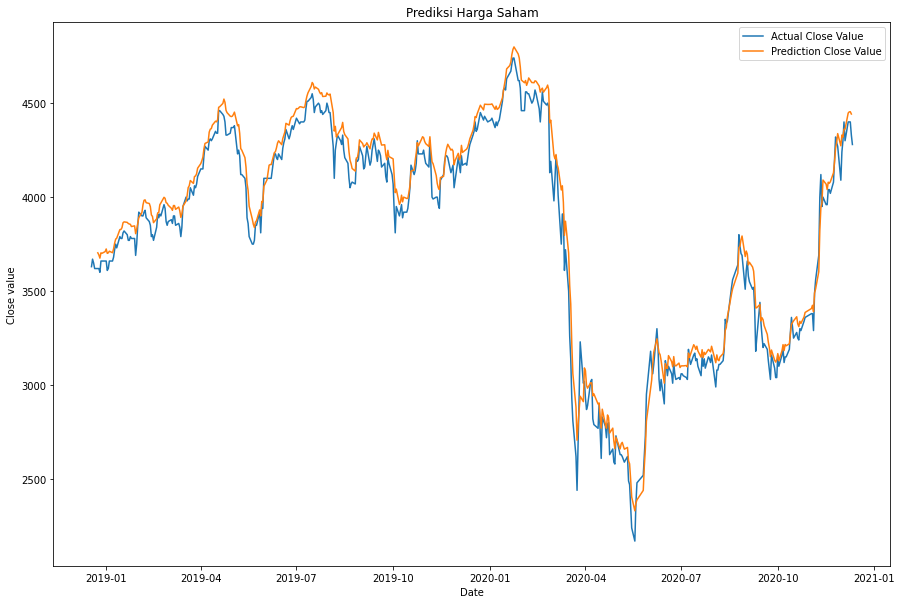

In [19]:
# Visualisasi hasil prediksi
grafik = []

indeks_prediksi = 0

# Memanggil data tanggal sebelumnya
for x in range(SLIDE_WINDOWS-1,len(df_dataset)-1):
  
  temp = {'Date': datetime.datetime.strptime(df_dataset.at[x,'Date'], '%Y-%m-%d'),'Close':list_prediksi[indeks_prediksi]}
  indeks_prediksi += 1 
  grafik.append(temp)

df_prediksi = pd.DataFrame(list(grafik))

#print(df_prediksi['Close'])

date=[]
close=[]

for x in range(len(df_dataset)):
  date.append(datetime.datetime.strptime(df_dataset.at[x,'Date'], '%Y-%m-%d'))
  close.append(df_dataset.at[x,'Close'])


plt.figure(figsize=(15,10))
plt.plot(date, close, label='Actual Close Value')
#plt.ylabel('Prediction Close')

plt.plot(df_prediksi['Date'], df_prediksi['Close'], label='Prediction Close Value')
plt.xlabel('Date')
plt.ylabel('Close value')
#plt.ylabel('Prediction Close')

plt.title('Prediksi Harga Saham')
plt.legend()
plt.show()